In [88]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.close("all")

# Testing concepts of the following paper:
# Eade, R., Smith, D., Scaife, A., Wallace, E., Dunstone, N., Hermanson, L., & Robinson, N. (2014). Do seasonal-to-decadal climate predictions underestimate the predictability of the real world? Geophysical Research Letters, 41(15), 5620–5628. https://doi.org/10.1002/2014GL061146
yearb, yeare = 2000, 2024 # Years for the period
time = np.arange(yearb, yeare  + 1)
nt = len(time)

# Creating the verification (observation) synthetic time series
# In the following framework we assume the "truth plus noise" paradigm, 
# that is, verifying observations are the sum of an (unknown) predictable component (Eade et al.) and noise representing
# inherent unpredictability;
# and individual model forecasts are the sum of the same (unknown) predictable component, a model error term 
# that embodies imperfect physics and initial states, and a noise term due to the model's own chaotic variability

sig_slow = 0.3
sig_fast = 0.5
x_slow = np.full(nt, np.nan)
x_slow[0] = np.random.randn() * sig_slow
alpha = 0.99
for jt in range(1, nt):
    x_slow[jt] = x_slow[jt - 1] * alpha + np.random.randn() * sig_slow

x_fast = np.random.randn(nt) * sig_fast
x_obs  = x_slow + x_fast

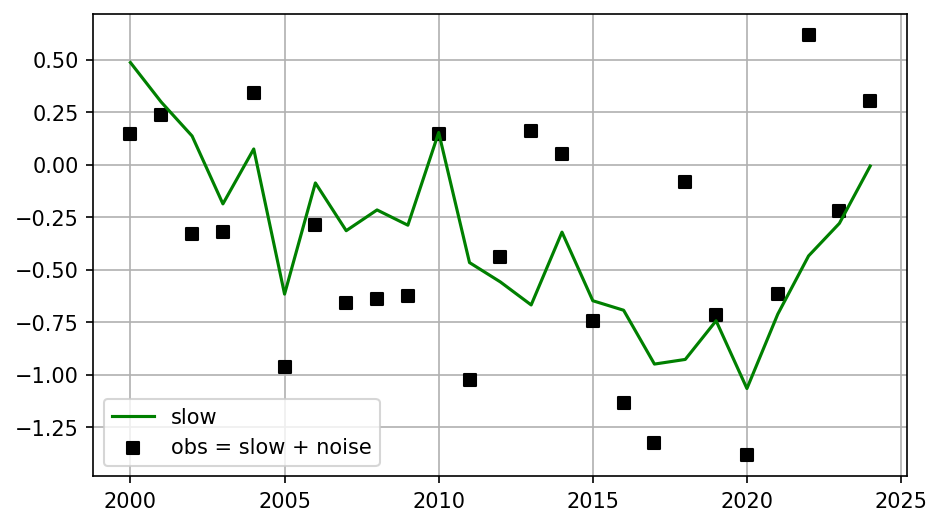

In [89]:
# Plots
fig, ax = plt.subplots(1, 1, dpi = 150, figsize = (7, 4))
ax.plot(time, x_slow, color = "green", label = "slow")
ax.scatter(time, x_obs, 30, marker = "s", color = "black", label = "obs = slow + noise")
ax.grid()
ax.set_axisbelow(True)
ax.legend()

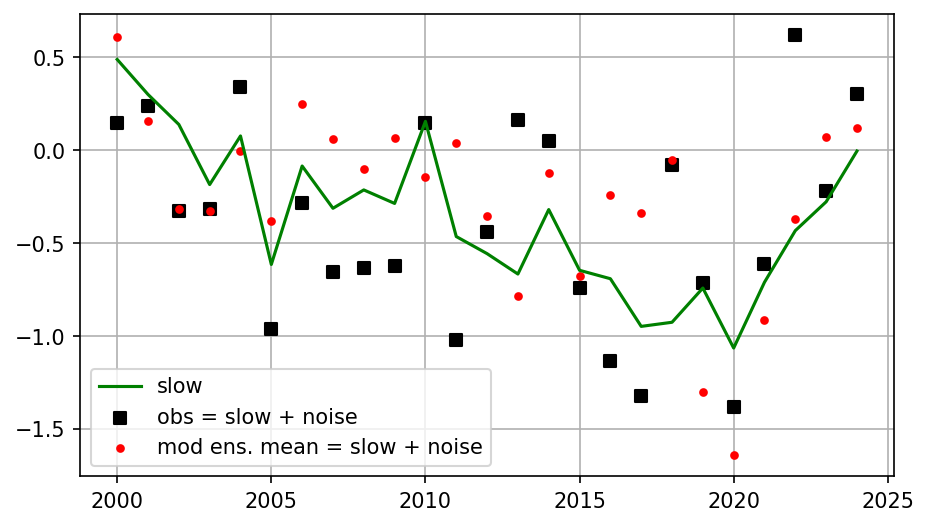

In [90]:
# Now create the forecasts
# We construct these forecasts with the following assumptions:
# - if we had an infinite ensemble size and a perfect physical model (as well as initialization system), the
# ensemble mean would be equal to the predictable component x_slow. In other words, even the best prediction system
# would not correlate perfectly with observations since observations have an inherently unpredictable component.
# - the fact that the model is imperfect introduces noise that is added to x_slow (that noise is the same to all members
# but varies unpredictably from year to year)
# - the fact that the ensemble size is limited introduces sampling variability added to the previous term

# We first create the slowly varying component (predictable component) of the model:
sig_slow_mod = 0.4
x_slow_mod = x_slow + np.random.randn(nt) * sig_slow_mod

ax.scatter(time,x_slow_mod, 40, marker = ".", color = "red", label = "mod ens. mean = slow + noise")
ax.legend()
fig


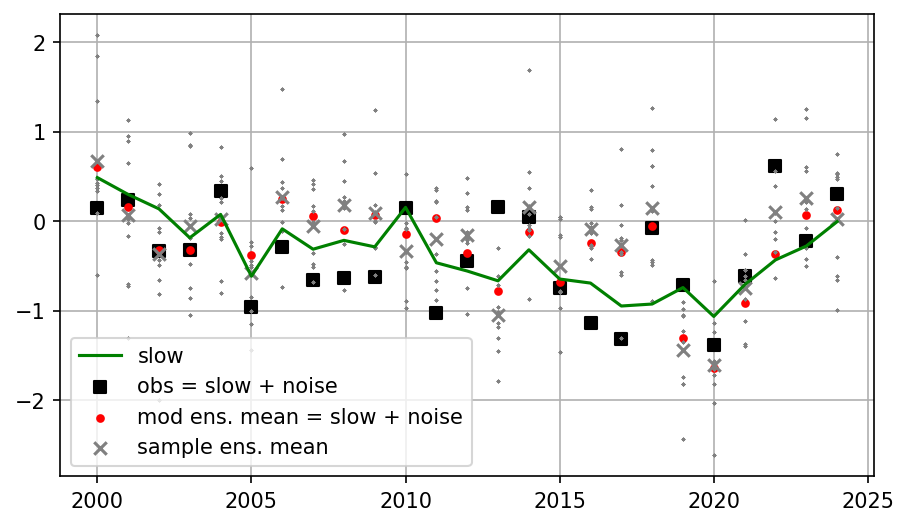

In [91]:
# Finally we create the ensemble members, taken as the predictable model component + noise

nMember = 10 # Ensemble size
sig_noise = 0.6
x_for = np.full((nMember, nt), np.nan)
for jMember in range(nMember):
    x_for[jMember, :] = x_slow_mod + np.random.randn(nt) * sig_noise
    ax.scatter(time, x_for[jMember, :], 1, marker = "x", color = "grey")

# Plot ensemble sampling mean
x_for_em = np.mean(x_for, axis = 0)
ax.scatter(time, x_for_em, marker = "x", color = "grey", label = "sample ens. mean" )    
ax.legend()
fig


Text(0.5, 1.0, 'r = PC_obs = 0.45(true PC_obs: 0.63)')

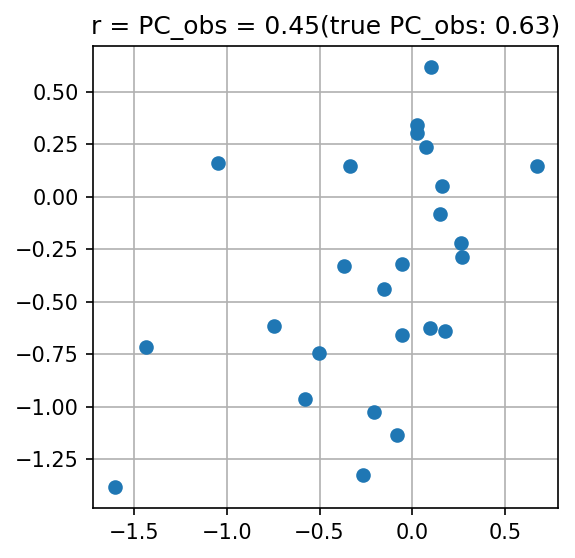

In [92]:
# Display statistics
# By regressing the predictor (sample mean) on the observed, we get PC_obs as the correlation
# 
fig2, ax2 = plt.subplots(1, 1, dpi = 150, figsize = (4, 4))
ax2.scatter (x_for_em, x_obs)
ax2.grid()
ax2.set_axisbelow(True)
r = np.corrcoef(x_for_em, x_obs)[0, 1]
# True predictable component = fraction of variance explained by the slow variability on the obs
r_true = np.corrcoef(x_slow, x_obs)[0, 1]
# Note that r_true will be in general > r since adding noise to signals that are correlated decreases the correlation
title = "r = PC_obs = " + str(np.round(r, 2)) + "(true PC_obs: " + str(np.round(r_true, 2)) + ")"
ax2.set_title(title)

In [93]:
# Now compute PC_mod
# In Eade et al, PC_mod is defined as the sqrt of the ratio between the variance of the ensemble mean and the variance of the members

s2_ensmean = np.var(x_for_em)
print("Time-variance of ensemble mean: " + str(var_ensmean))
# Note that this variance compounds three factors of variability: 
# The variance of the slowly varying component, the variance of the model error, and the variance of the sampling effects

# This is the average variance of individual members
s2_tot = np.mean(np.var(x_for, axis = 0))
print("Time-averaged variance of ensemble members: " + str(s2_tot) + " (Truth: " + str(sig_noise ** 2) + ")")


# Ratio of predictable components
RPC = r / np.sqrt(s2_ensmean / s2_tot)
print("RPC (Eade et al): " + str(RPC))

# The predictable component in observation should be the r(obs, slow)
print("True PC_obs: " + str(np.round(np.corrcoef(x_slow, x_obs)[0, 1], 2)))


Time-variance of ensemble mean: 1.1683967646614806
Time-averaged variance of ensemble members: 0.29441962575126546 (Truth: 0.36)
RPC (Eade et al): 0.46477838465436716
True PC_obs: 0.63
